In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
some_digit = X[0]

Exercise 1.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [4]:
from sklearn.metrics import accuracy_score

pred = knn_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9688

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'leaf_size': [5, 10, 15, 20, 25],
}
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [5, 10, 15, 20, 25],
                         'n_neighbors': [3, 5, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [6]:
print('best params:', grid_search.best_params_)
print('best score:', grid_search.best_score_)

best params: {'leaf_size': 5, 'n_neighbors': 3, 'weights': 'distance'}
best score: 0.9711166666666665


In [7]:
knn_clf = KNeighborsClassifier(leaf_size=5, n_neighbors=3, weights='distance', n_jobs=-1)
knn_clf.fit(X_train, y_train)
pred = knn_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9717

Exercise 2.

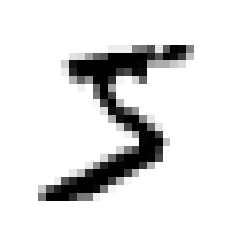

In [8]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

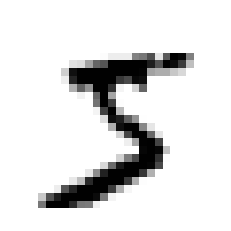

In [9]:
from scipy.ndimage.interpolation import shift

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
some_digit_image = shift(some_digit_image, [1, 0], cval=0)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [10]:
def image_shift(image):
    image = image.reshape(28, 28)
    up = shift(image, [1, 0], cval=0).reshape(-1)
    down = shift(image, [-1, 0], cval=0).reshape(-1)
    left = shift(image, [0, -1], cval=0).reshape(-1)
    right = shift(image, [0, 1], cval=0).reshape(-1)
    return up, down, left, right

In [11]:
from sklearn.utils import shuffle

def data_augmentation(X_train, y_train):
    expansion = []
    label_expansion = []
    for i in range(len(X_train)):
        up, down, left, right = image_shift(X_train[i])
        expansion.extend([up, down, left, right])
        label_expansion.extend([y_train[i], y_train[i], y_train[i], y_train[i]])
    expansion_shuffle, label_expansion_shuffle = shuffle(expansion, label_expansion)
    X_train_expansion = np.array(list(X_train) + expansion_shuffle)
    y_train_expansion = np.array(list(y_train) + label_expansion_shuffle)
    return X_train_expansion ,y_train_expansion

In [12]:
 X_train_expansion ,y_train_expansion = data_augmentation(X_train, y_train)

In [13]:
knn_clf = KNeighborsClassifier(leaf_size=5, n_neighbors=3, weights='distance', n_jobs=-1)
knn_clf.fit(X_train_expansion, y_train_expansion)
pred = knn_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9763